<a href="https://colab.research.google.com/github/Seenuprime/Data-Analytics/blob/main/Customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

In [129]:
!kaggle datasets download -d alfathterry/telco-customer-churn-11-1-3

Dataset URL: https://www.kaggle.com/datasets/alfathterry/telco-customer-churn-11-1-3
License(s): MIT
telco-customer-churn-11-1-3.zip: Skipping, found more recently modified local copy (use --force to force download)


In [130]:
import zipfile

zip_dir = zipfile.ZipFile('/content/telco-customer-churn-11-1-3.zip')
zip_dir.extractall()
zip_dir.close()

In [131]:
df = pd.read_csv(r'telco.csv')
df.head()

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges


In [132]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married',
       'Dependents', 'Number of Dependents', 'Country', 'State', 'City',
       'Zip Code', 'Latitude', 'Longitude', 'Population', 'Quarter',
       'Referred a Friend', 'Number of Referrals', 'Tenure in Months', 'Offer',
       'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'Customer Status', 'Churn Label',
       'Churn Score', 'CLTV', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [133]:
df.isnull().sum()

,0
Customer ID,0
Gender,0
Age,0
Under 30,0
Senior Citizen,0
Married,0
Dependents,0
Number of Dependents,0
Country,0
State,0


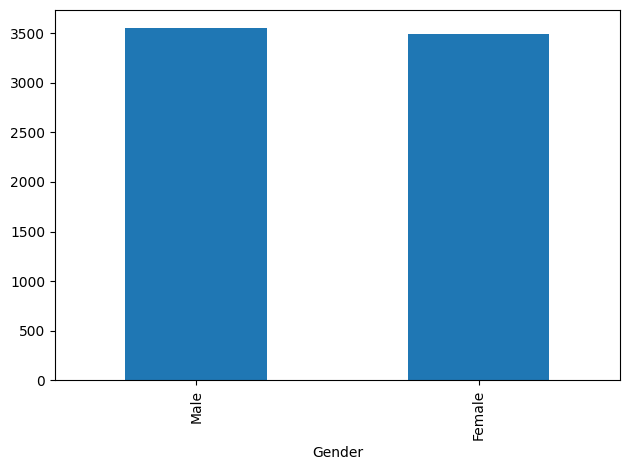

In [134]:
df.Gender.value_counts().plot(kind='bar')
plt.tight_layout()

In [135]:
hist, bin_edges = np.histogram(df.Age, 20)
hist, bin_edges

(array([524, 393, 366, 365, 379, 375, 415, 379, 395, 418, 361, 384, 385,
        380, 382, 203, 232, 211, 219, 277]),
 array([19.  , 22.05, 25.1 , 28.15, 31.2 , 34.25, 37.3 , 40.35, 43.4 ,
        46.45, 49.5 , 52.55, 55.6 , 58.65, 61.7 , 64.75, 67.8 , 70.85,
        73.9 , 76.95, 80.  ]))

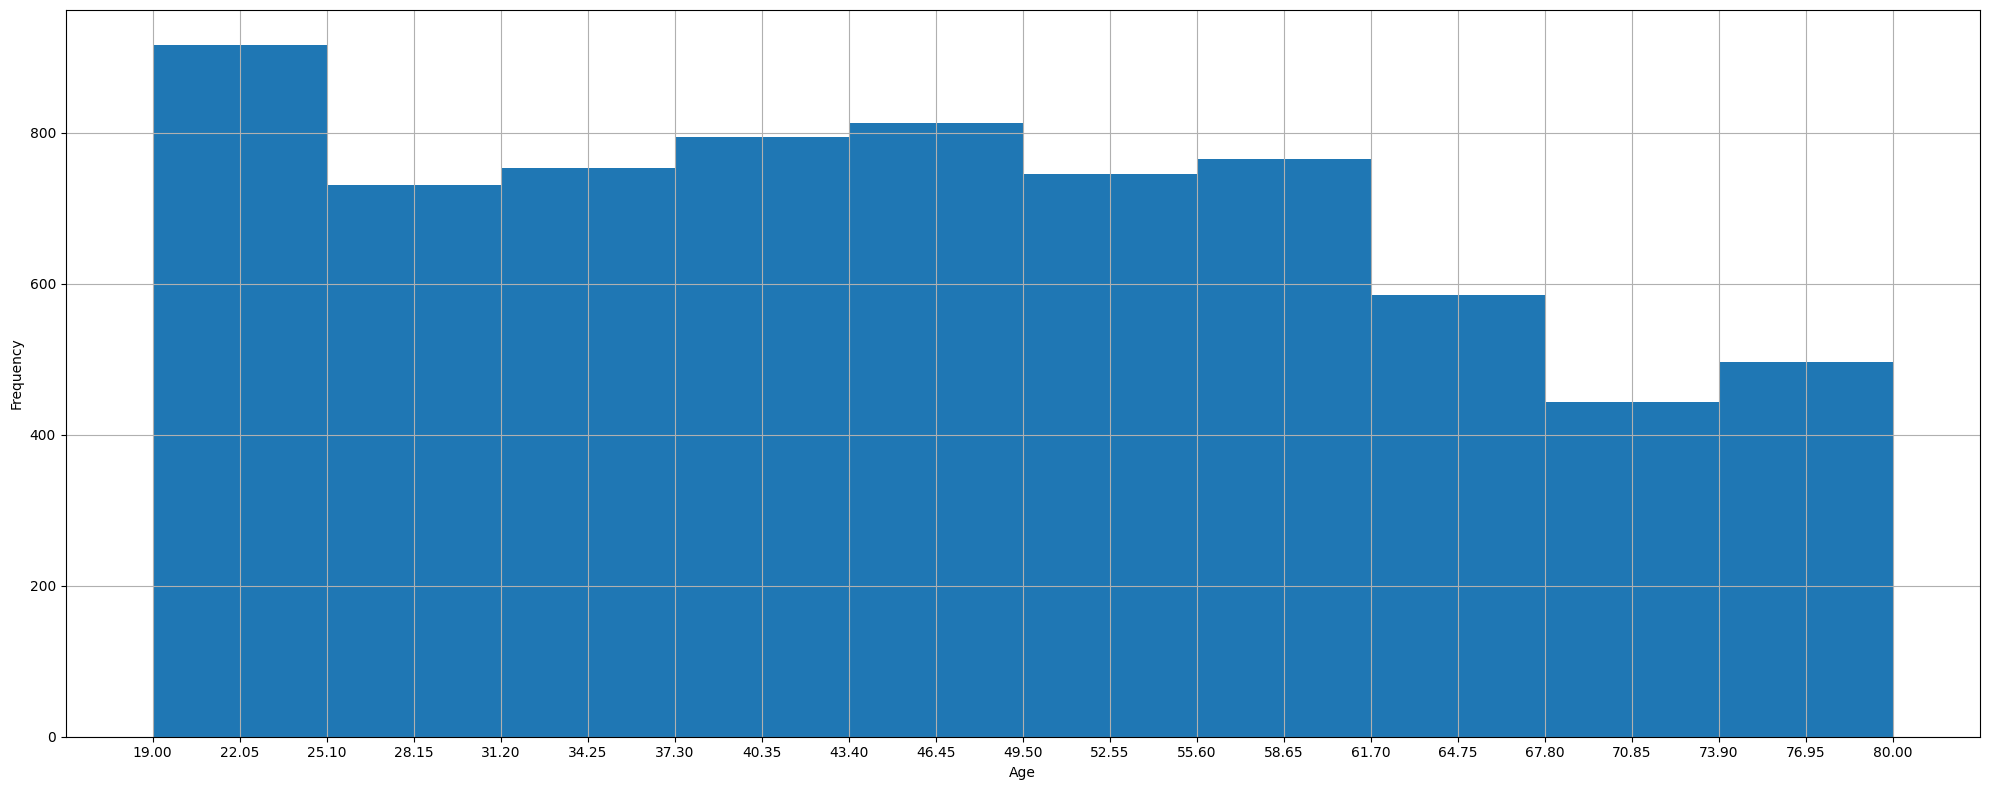

In [136]:
plt.figure(figsize=(20, 8))
plt.grid()
df['Age'].plot(kind='hist', xticks=bin_edges, grid=True)
plt.xlabel('Age')
plt.tight_layout()

In [137]:
df['Senior Citizen'].value_counts()

,count
Senior Citizen,
No,5901
Yes,1142


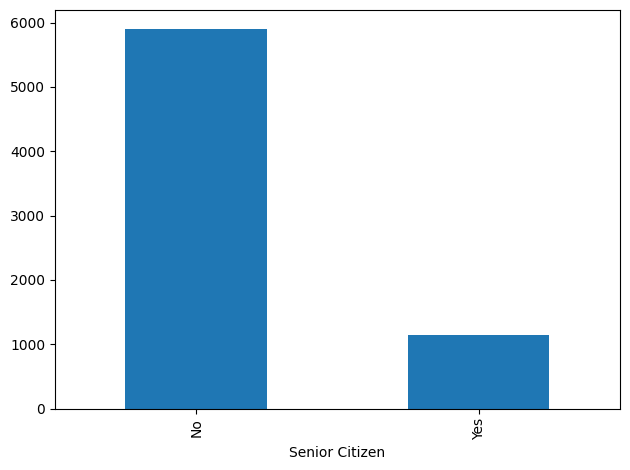

In [138]:
df['Senior Citizen'].value_counts().plot(kind='bar')
plt.tight_layout()

In [139]:
df.Married.value_counts()

,count
Married,
No,3641
Yes,3402


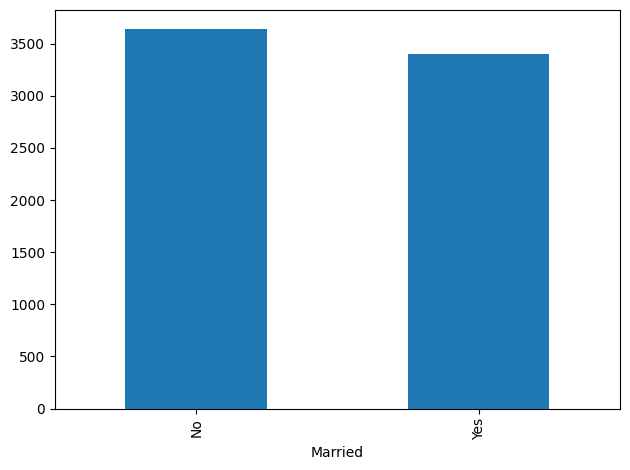

In [140]:
df.Married.value_counts().plot(kind='bar')
plt.tight_layout()

In [141]:
num_depe = np.histogram(df['Number of Dependents'])
num_depe

(array([5416,  553,  531,  517,    9,   10,    3,    2,    1,    1]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]))

Text(0.5, 58.7222222222222, 'Dependencies')

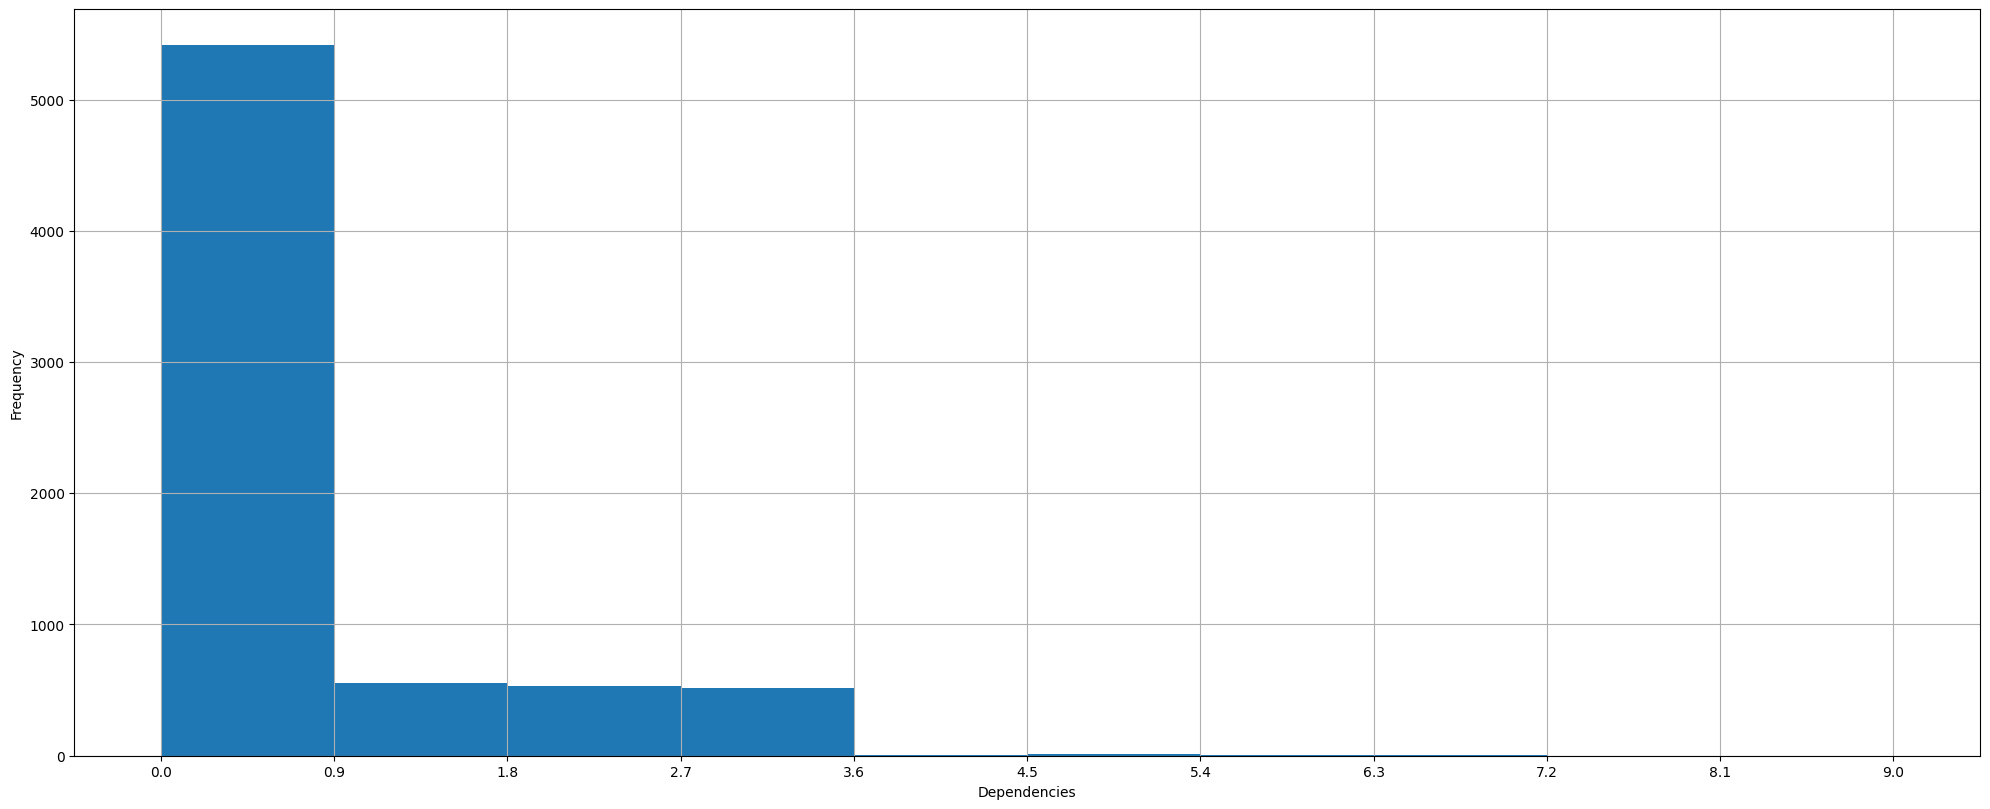

In [142]:
plt.figure(figsize=(20, 8))
df['Number of Dependents'].plot(kind='hist', xticks=num_depe[1], grid=True)
plt.tight_layout()
plt.xlabel('Dependencies')

<Axes: ylabel='Churn Reason'>

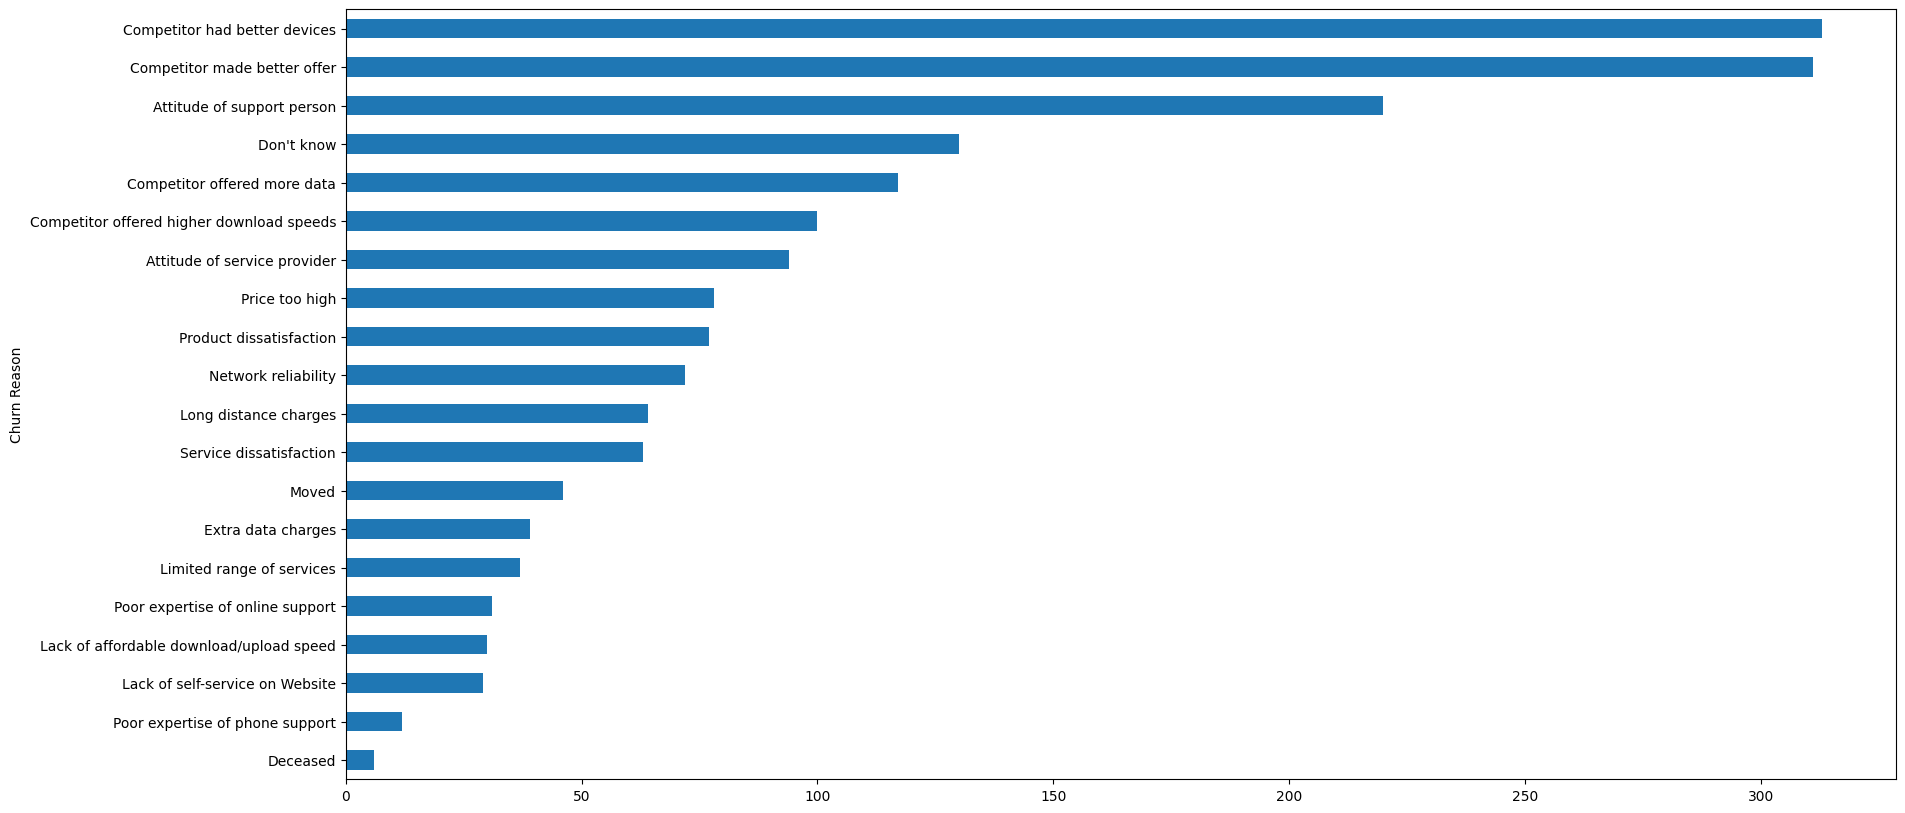

In [143]:
plt.figure(figsize=(20, 10))
df['Churn Reason'].value_counts().sort_values().plot(kind='barh')

In [144]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married',
       'Dependents', 'Number of Dependents', 'Country', 'State', 'City',
       'Zip Code', 'Latitude', 'Longitude', 'Population', 'Quarter',
       'Referred a Friend', 'Number of Referrals', 'Tenure in Months', 'Offer',
       'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'Customer Status', 'Churn Label',
       'Churn Score', 'CLTV', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [145]:
df.drop(['Customer ID', 'Latitude', 'Longitude', 'Population', 'Quarter', 'Referred a Friend', 'Number of Referrals', 'Tenure in Months',
        'Multiple Lines', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies'],
        axis=1, inplace=True)

In [146]:
df.head()

,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,City,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,Male,78,No,Yes,No,No,0,United States,California,Los Angeles,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,Female,74,No,Yes,Yes,Yes,1,United States,California,Los Angeles,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,Male,71,No,Yes,No,Yes,3,United States,California,Los Angeles,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,Female,78,No,Yes,Yes,Yes,1,United States,California,Inglewood,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,Female,80,No,Yes,Yes,Yes,1,United States,California,Whittier,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges


In [147]:
df.Country.unique()

array(['United States'], dtype=object)

In [148]:
df.State.unique()

array(['California'], dtype=object)

In [149]:
df.City.unique()

array(['Los Angeles', 'Inglewood', 'Whittier', ..., 'Topaz', 'Jacumba',
       'Holtville'], dtype=object)

In [150]:
df.columns

Index(['Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married', 'Dependents',
       'Number of Dependents', 'Country', 'State', 'City', 'Zip Code', 'Offer',
       'Phone Service', 'Avg Monthly Long Distance Charges',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'Customer Status', 'Churn Label',
       'Churn Score', 'CLTV', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [151]:
df.drop([
    'Country',
    'State',
    'Zip Code',
    'Customer Status',
    'Churn Score',
    'Churn Category',
    'Churn Reason',
    'Offer',
    'Payment Method'], axis=1, inplace=True)

In [152]:
df.head()

,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,City,Phone Service,Avg Monthly Long Distance Charges,...,Paperless Billing,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Label,CLTV
0,Male,78,No,Yes,No,No,0,Los Angeles,No,0.00,...,Yes,39.65,39.65,0.00,20,0.00,59.65,3,Yes,5433
1,Female,74,No,Yes,Yes,Yes,1,Los Angeles,Yes,48.85,...,Yes,80.65,633.30,0.00,0,390.80,1024.10,3,Yes,5302
2,Male,71,No,Yes,No,Yes,3,Los Angeles,Yes,11.33,...,Yes,95.45,1752.55,45.61,0,203.94,1910.88,2,Yes,3179
3,Female,78,No,Yes,Yes,Yes,1,Inglewood,Yes,19.76,...,Yes,98.50,2514.50,13.43,0,494.00,2995.07,2,Yes,5337
4,Female,80,No,Yes,Yes,Yes,1,Whittier,Yes,6.33,...,Yes,76.50,2868.15,0.00,0,234.21,3102.36,2,Yes,2793


In [153]:
df.columns

Index(['Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married', 'Dependents',
       'Number of Dependents', 'City', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Internet Service',
       'Internet Type', 'Avg Monthly GB Download', 'Streaming Music',
       'Unlimited Data', 'Contract', 'Paperless Billing', 'Monthly Charge',
       'Total Charges', 'Total Refunds', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Total Revenue', 'Satisfaction Score',
       'Churn Label', 'CLTV'],
      dtype='object')

In [154]:
X = df.drop(['Churn Label'], axis=1)
y = df['Churn Label']

In [155]:
X.head()

,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,City,Phone Service,Avg Monthly Long Distance Charges,...,Contract,Paperless Billing,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,CLTV
0,Male,78,No,Yes,No,No,0,Los Angeles,No,0.00,...,Month-to-Month,Yes,39.65,39.65,0.00,20,0.00,59.65,3,5433
1,Female,74,No,Yes,Yes,Yes,1,Los Angeles,Yes,48.85,...,Month-to-Month,Yes,80.65,633.30,0.00,0,390.80,1024.10,3,5302
2,Male,71,No,Yes,No,Yes,3,Los Angeles,Yes,11.33,...,Month-to-Month,Yes,95.45,1752.55,45.61,0,203.94,1910.88,2,3179
3,Female,78,No,Yes,Yes,Yes,1,Inglewood,Yes,19.76,...,Month-to-Month,Yes,98.50,2514.50,13.43,0,494.00,2995.07,2,5337
4,Female,80,No,Yes,Yes,Yes,1,Whittier,Yes,6.33,...,Month-to-Month,Yes,76.50,2868.15,0.00,0,234.21,3102.36,2,2793


In [156]:
y.value_counts()

,count
Churn Label,
No,5174
Yes,1869


In [168]:
X.isnull().sum()

,0
Gender,0
Age,0
Under 30,0
Senior Citizen,0
Married,0
Dependents,0
Number of Dependents,0
City,0
Phone Service,0
Avg Monthly Long Distance Charges,0


In [170]:
X['Internet Type'].fillna(value='unknown', inplace=True)

In [171]:
X.isna().sum()

,0
Gender,0
Age,0
Under 30,0
Senior Citizen,0
Married,0
Dependents,0
Number of Dependents,0
City,0
Phone Service,0
Avg Monthly Long Distance Charges,0


In [172]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [173]:
categorical_cols = ['Gender', 'Under 30', 'Senior Citizen', 'Married', 'Dependents',
                    'City', 'Phone Service', 'Internet Service', 'Internet Type',
                    'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing']

numeric_cols = ['Age', 'Number of Dependents', 'Avg Monthly Long Distance Charges',
                'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges',
                'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges',
                'Satisfaction Score', 'Total Revenue', 'CLTV']

In [174]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ],
    remainder='drop'
)

In [175]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [176]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [177]:
pipeline.fit(X_train, y_train)

acc_score = pipeline.score(X_test, y_test)
print("Accuracy Score:", acc_score)

Accuracy Score: 0.9563520227111426


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
